# Final Project

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

# Final Project by Christina Park
## Introduction
For my final project, I have decided to look at Ultra Trail Running data from TidyTuesday. This specific data was from the International Trail Running Association. I wanted to look at the statistics of runners ranking first (rank = 1) and finding their nationalities, ages, and genders. I also wanted to look at the statistics of a single race. I chose the race with a race ID of 67856 because it had less runners and was easier to visualize.

In [1]:
# read in tidyverse and the dataset
library('tidyverse')
race.data = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-10-26/ultra_rankings.csv')

# look at dataset generally
race.data %>% head

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


── Column specification ────────────────────────────────────────────────────────
cols(
  race_year_id = col_double(),
  rank = col_double(),
  runner = col_character(),
  time = col_character(),
  age = col_double(),
  gender = col_character(),
  nationality = col_character(),
  time_in_seconds = col_double()
)




race_year_id,rank,runner,time,age,gender,nationality,time_in_seconds
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
68140,1,VERHEUL Jasper,26H 35M 25S,30,M,GBR,95725
68140,2,MOULDING JON,27H 0M 29S,43,M,GBR,97229
68140,3,RICHARDSON Phill,28H 49M 7S,38,M,GBR,103747
68140,4,DYSON Fiona,30H 53M 37S,55,W,GBR,111217
68140,5,FRONTERAS Karen,32H 46M 21S,48,W,GBR,117981
68140,6,THOMAS Leigh,32H 46M 40S,31,M,GBR,118000


In [2]:
# look at data for runners in rank 1
rank1 = race.data %>% filter(rank == 1)
rank1 %>% head

race_year_id,rank,runner,time,age,gender,nationality,time_in_seconds
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
68140,1,VERHEUL Jasper,26H 35M 25S,30,M,GBR,95725
72496,1,D HAENE Francois,20H 45M 59S,36,M,FRA,74759
69855,1,PIPITONE Anthony,24H 46M 23S,36,M,FRA,89183
67856,1,MARINOV Dimitar,20H 41M 6S,37,M,BUL,74466
67856,1,Minkov Hristo,20H 41M 6S,20,M,BUL,74466
70469,1,SEMIZ Ferhat,18H 50M 44S,35,M,TUR,67844


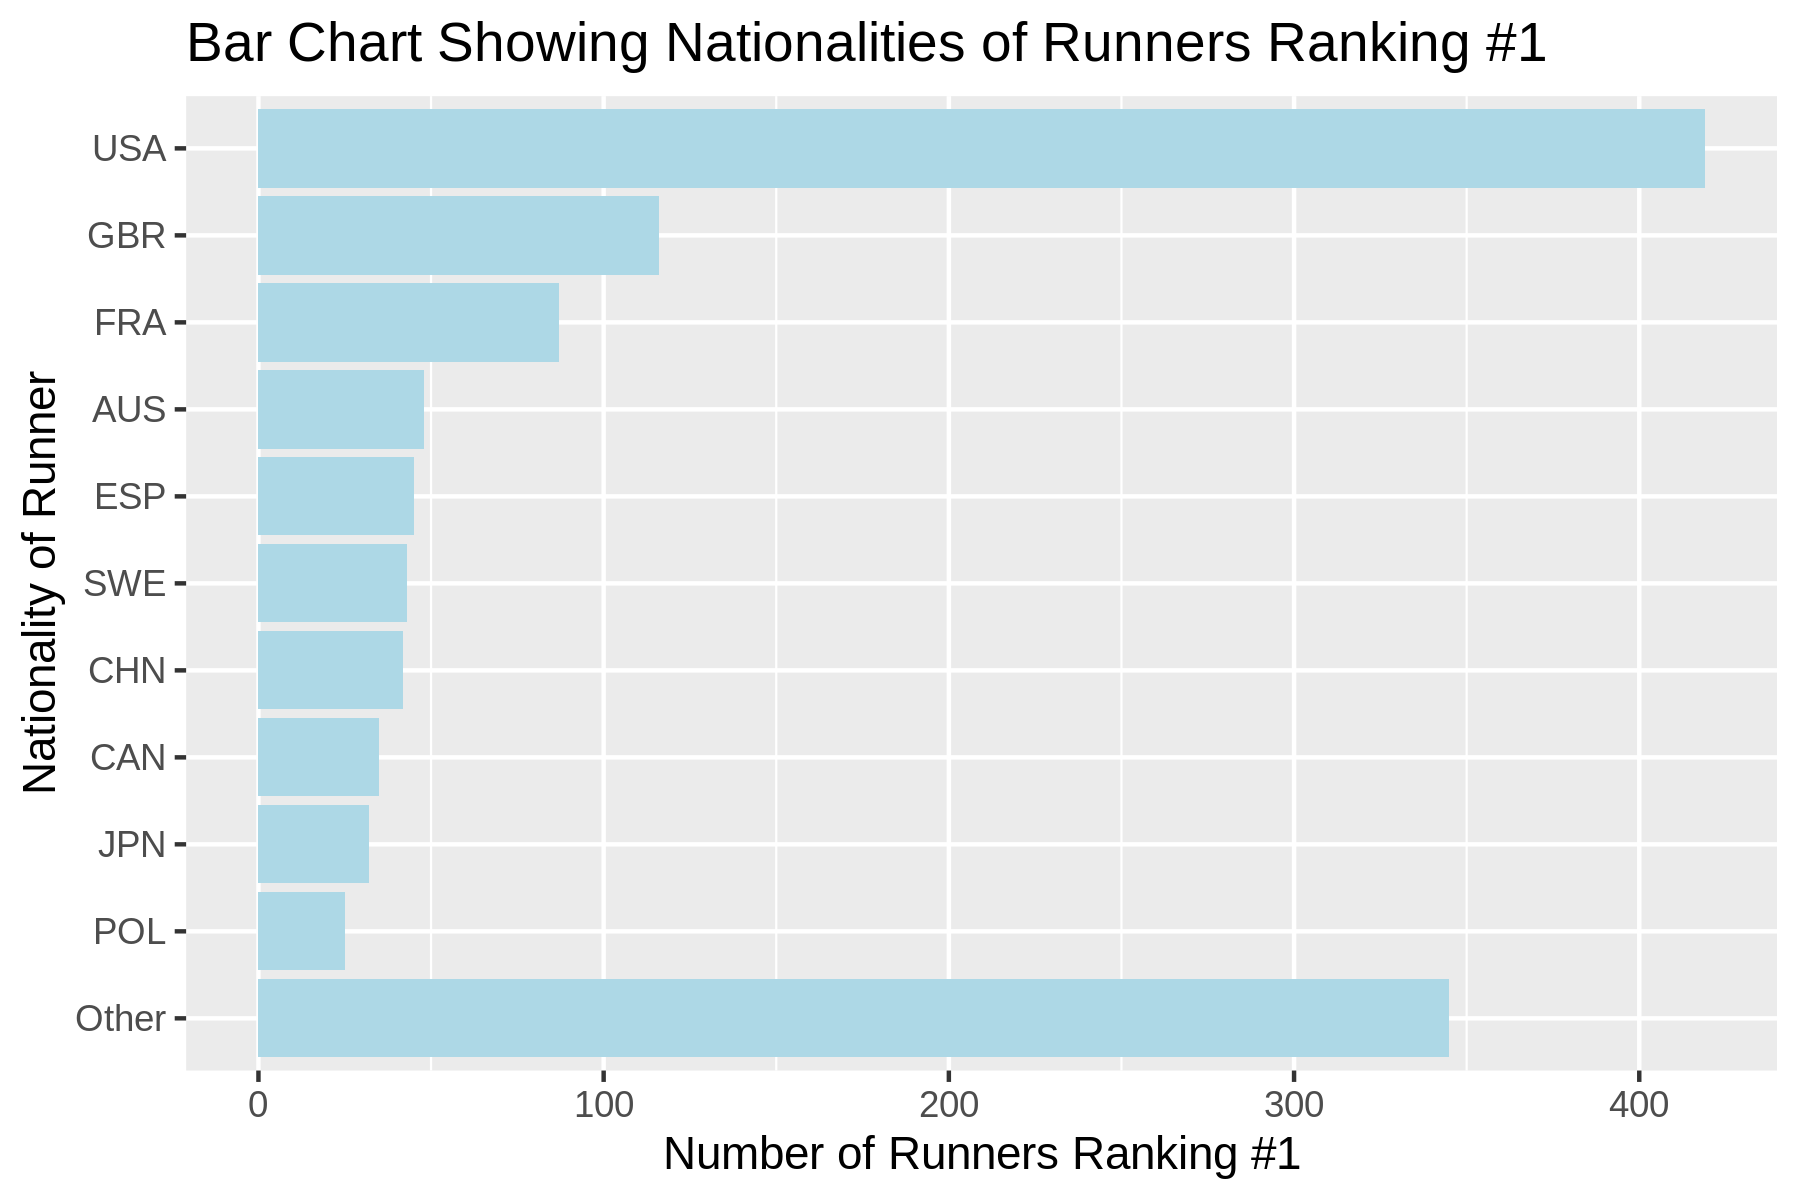

In [3]:
# sort data for nationality of rank 1 runners
rank1_sorted = rank1 %>% mutate(nationality_sorted = nationality %>% fct_lump(n = 10) %>% fct_infreq()
            %>% fct_relevel('Other', after = Inf) %>% fct_rev())

# make chart wider so title fits
options(repr.plot.width = 6)

# plot a bar chart of rank 1 data sorted by runners' nationalities
p = ggplot(rank1_sorted, aes(y = nationality_sorted))
p = p + geom_bar(fill = 'light blue')
p = p + labs(x = 'Number of Runners Ranking #1', y = 'Nationality of Runner')
p = p + ggtitle("Bar Chart Showing Nationalities of Runners Ranking #1")
p

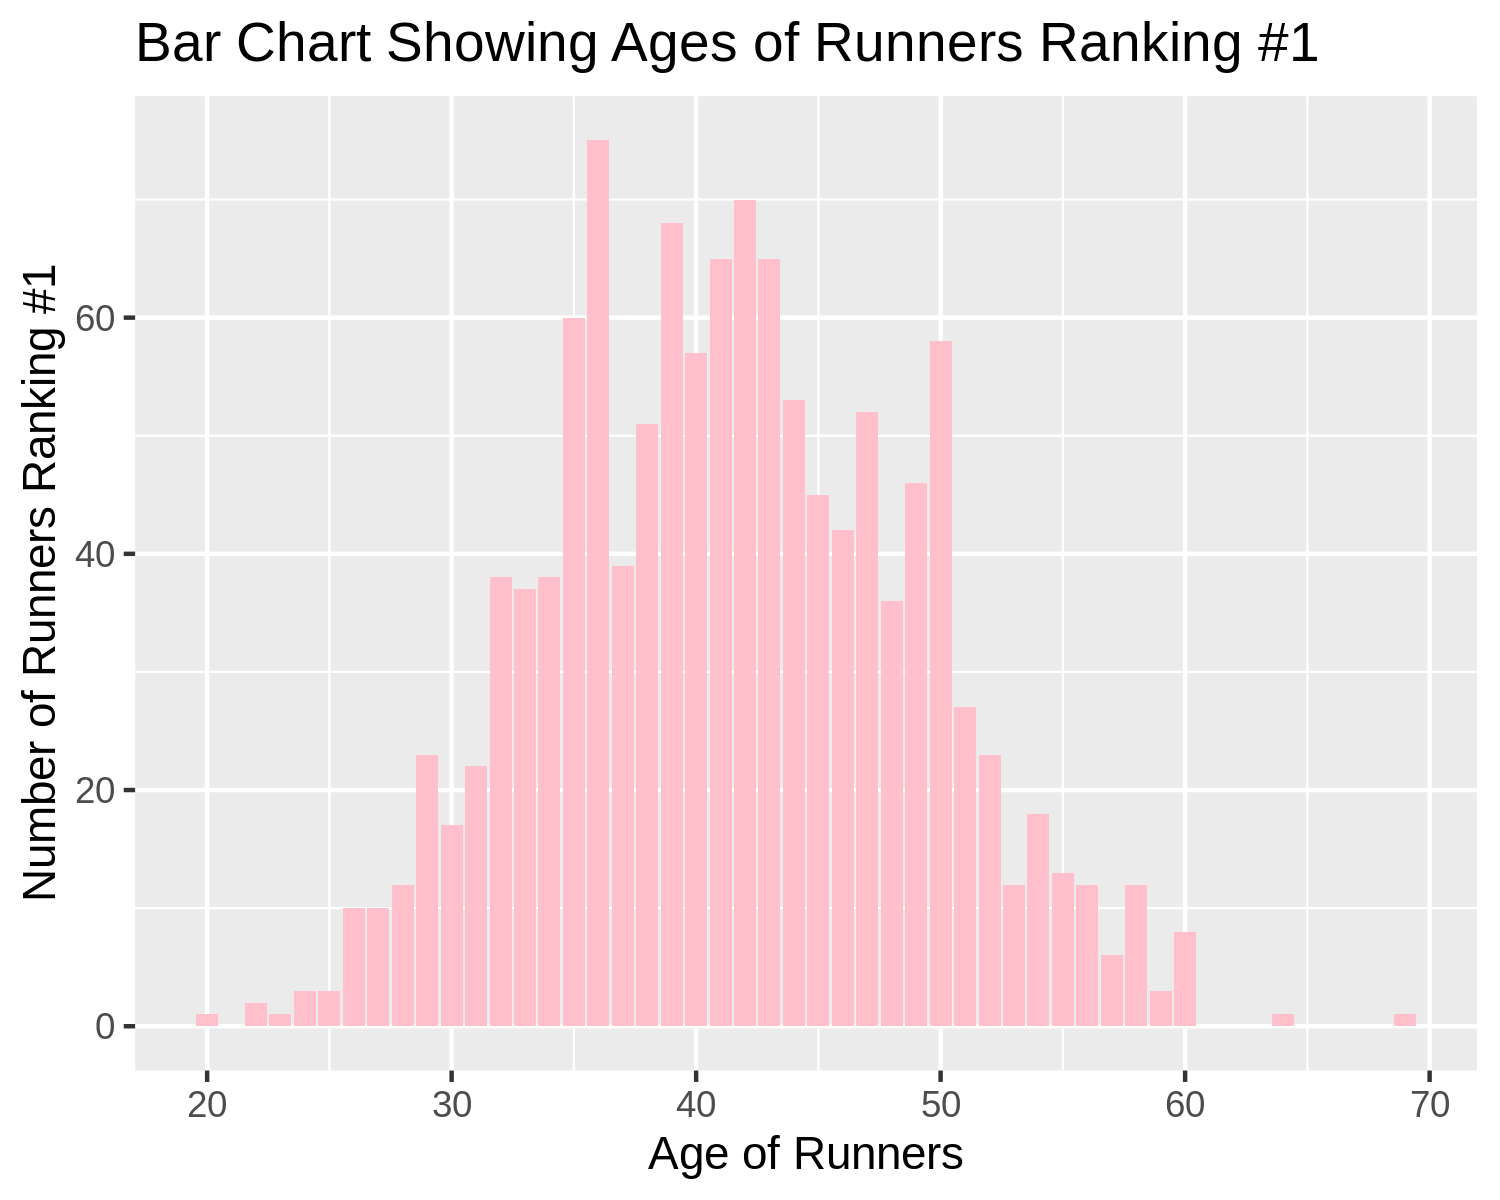

In [4]:
# remove null values from data
rank1_sorted_age = rank1 %>% filter(age > 0)

# back to normal width
options(repr.plot.width = 5)

# plot a bar chart of rank 1 data sorted by runners' ages
p = ggplot(rank1_sorted_age, aes(x = age))
p = p + geom_bar(fill = 'pink')
p = p + labs(x = 'Age of Runners', y = 'Number of Runners Ranking #1')
p = p + ggtitle("Bar Chart Showing Ages of Runners Ranking #1")
p

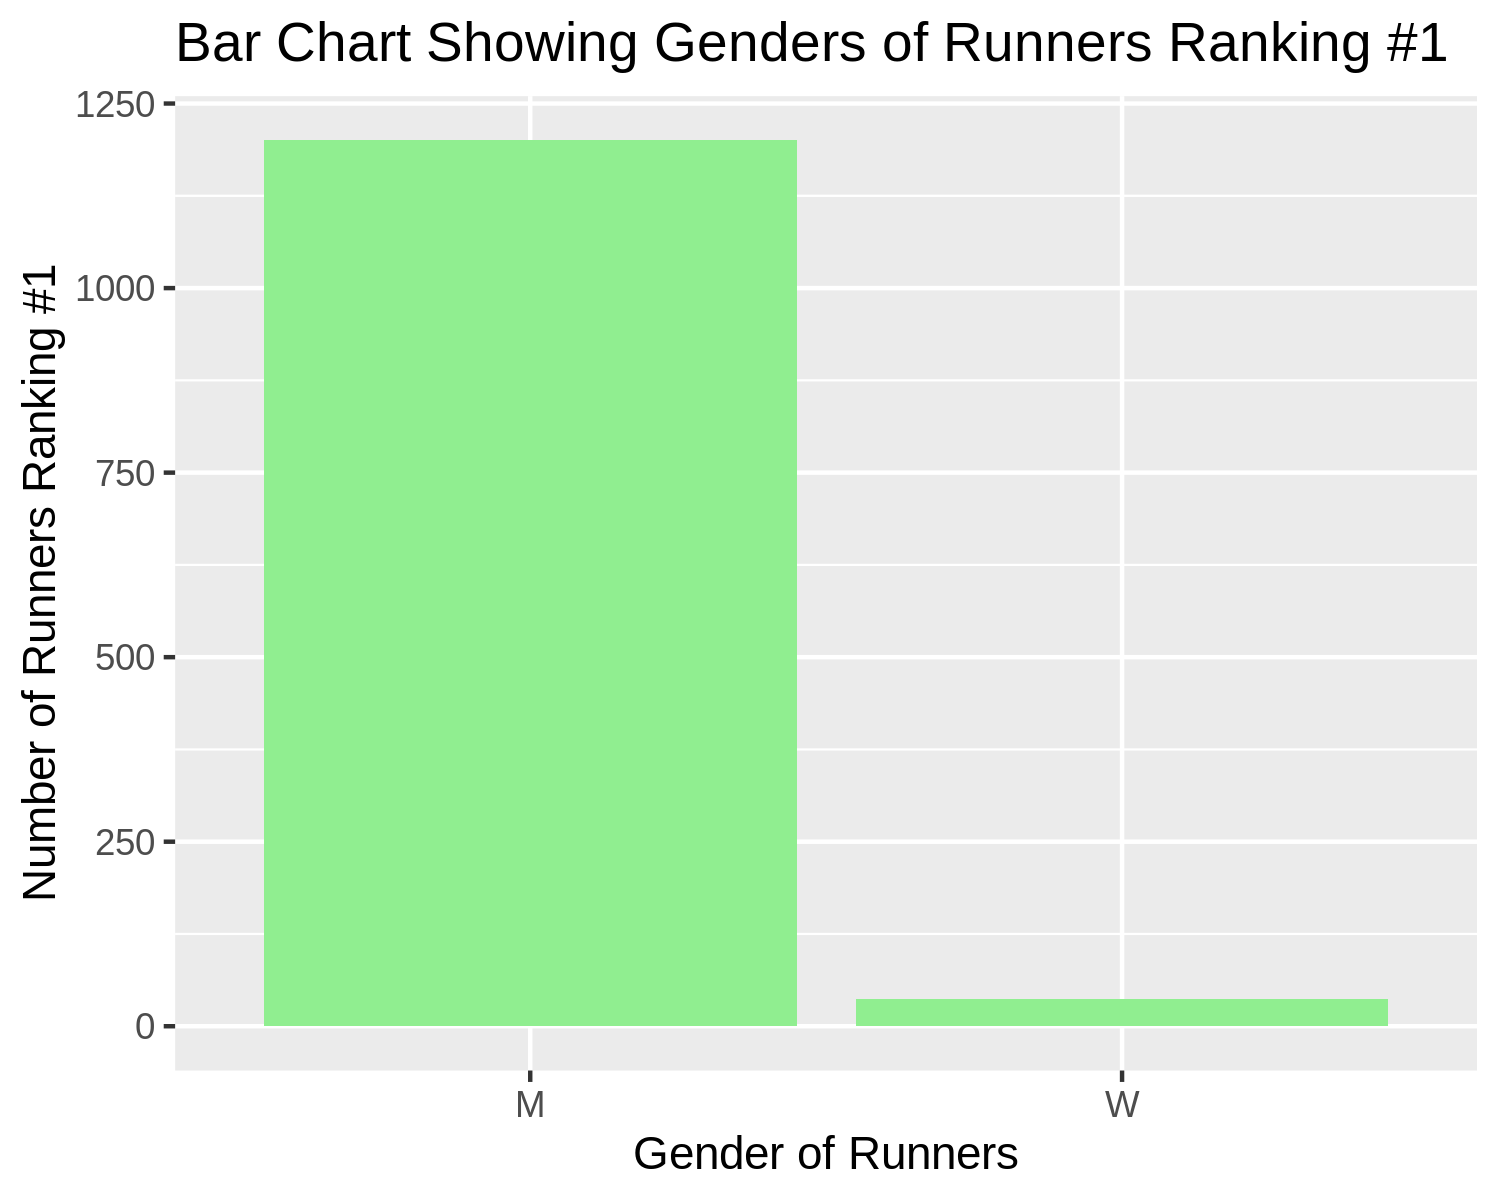

In [5]:
# plot a bar chart of rank 1 data sorted by runners' genders
p = ggplot(rank1, aes(x = gender))
p = p + geom_bar(fill = 'light green')
p = p + labs(x = 'Gender of Runners', y = 'Number of Runners Ranking #1')
p = p + ggtitle("Bar Chart Showing Genders of Runners Ranking #1")
p

## Analysis of Rank #1 Bar Charts
In these bar charts, I wanted to show the nationality, age, and gender of the runners that came in first. As we can see from the first bar chart, most of the winners are from the US. However, this could be because most of the races were held in America, but we did not have any information about the races. More studies could be used to run more analysis on this topic. From this second bar chart, we can see that the ages of the winners is in a normal distribution with the mean being around 43. This means that most of the winners of these races are middle-aged, but the age range is from 20 to around 69. Lastly, the third bar chart shows that most of the winners were male. Now, let's look at a specific race.

Warning message:
“Removed 15 rows containing missing values (geom_point).”


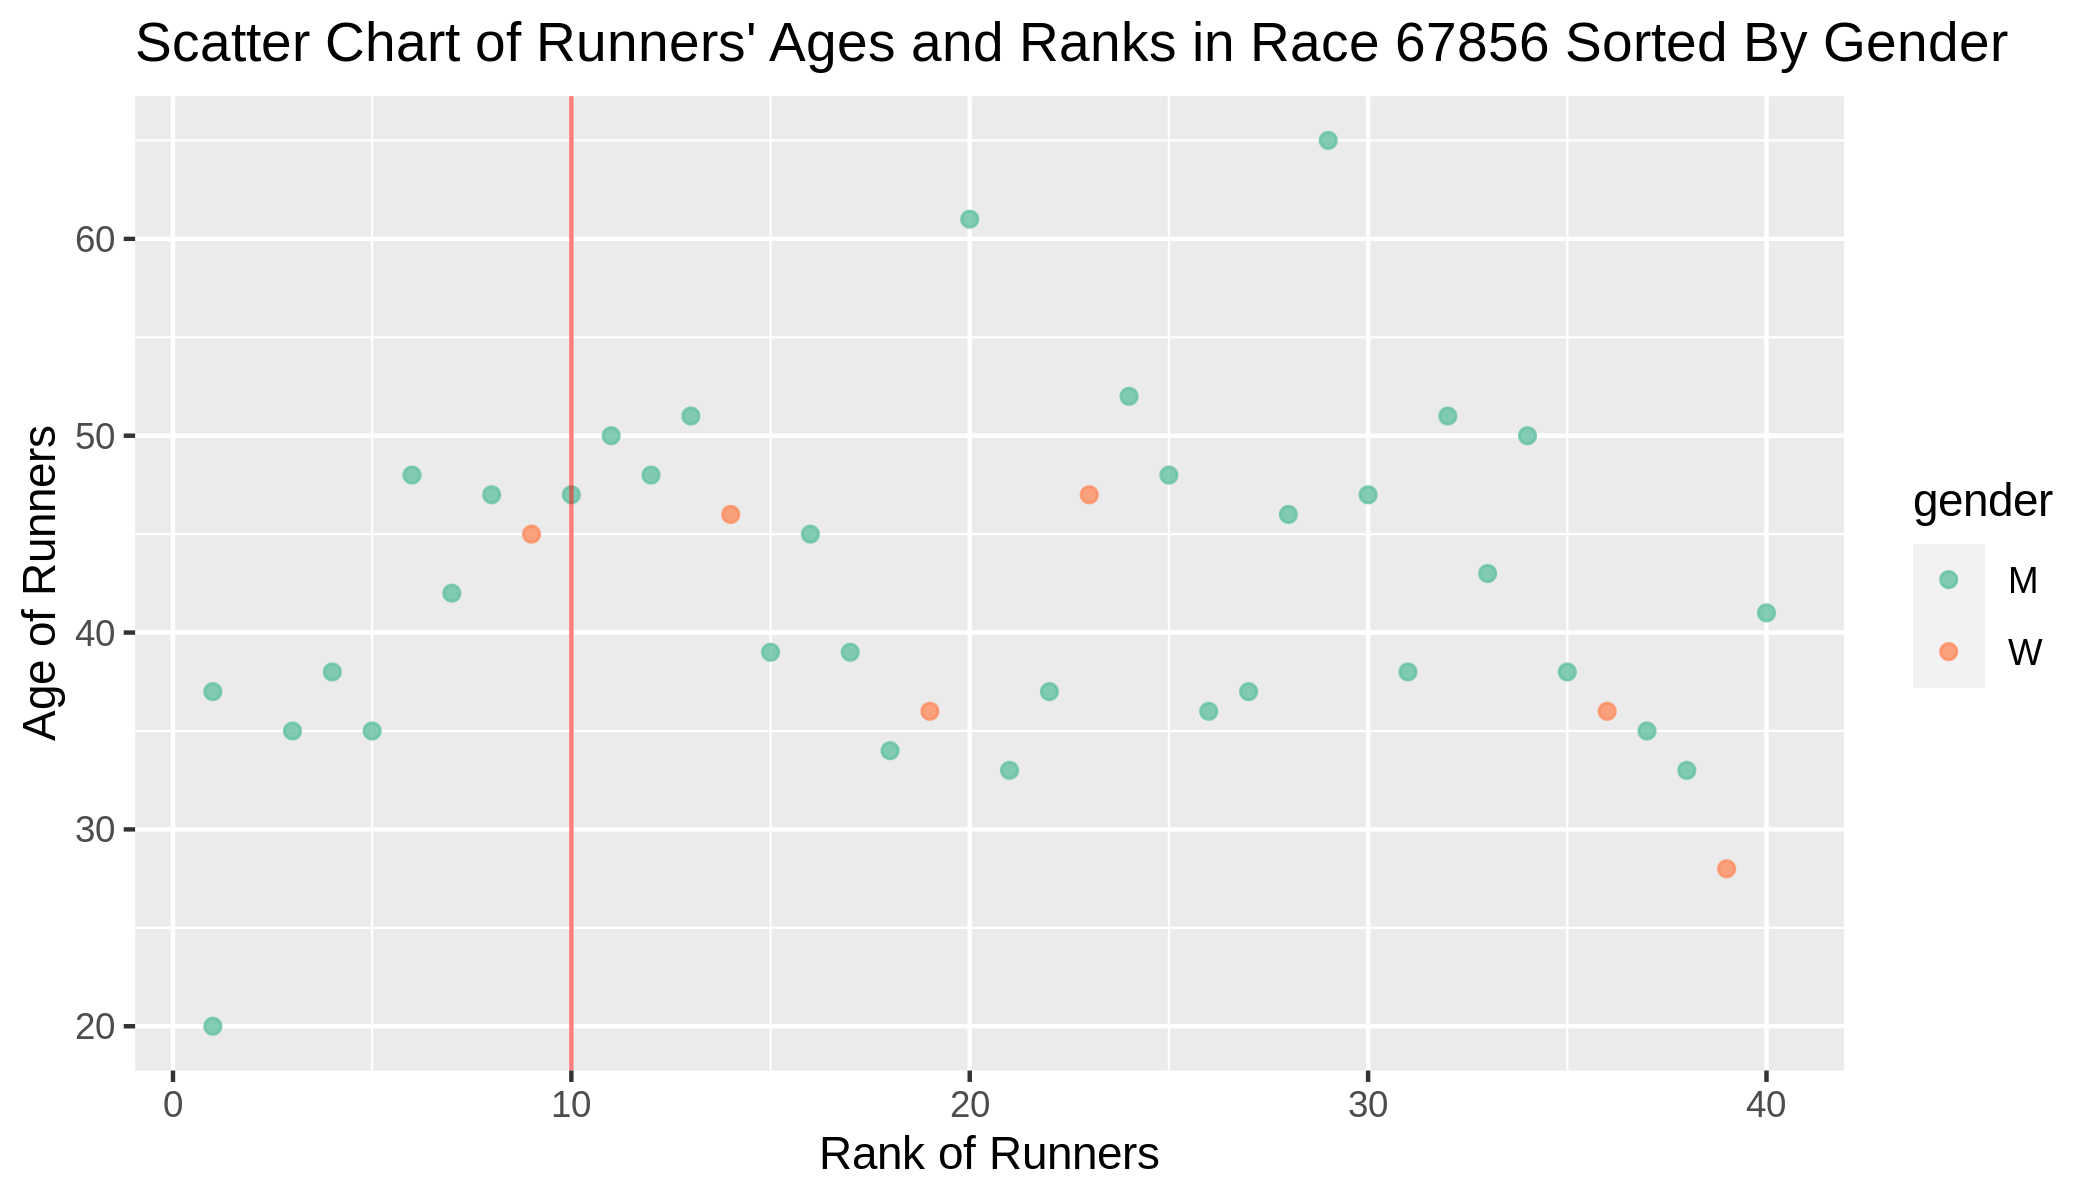

In [6]:
# sort data for specifc race with id of 67856
specificrace = race.data %>% filter(race_year_id == 67856)

# make chart wider so title fits
options(repr.plot.width = 7)

# plot a scatter chart of race 67856 data sorted by runners' genders with x = rank and y = age
p = ggplot(specificrace, aes(x = rank, y = age, color = gender))
p = p + geom_point(alpha = 0.8)
p = p + geom_vline(aes(xintercept = 10), color = 'red', alpha = 0.5) #shows top 10 easily
p = p + scale_color_brewer(palette = "Set2") #change colors
p = p + labs(x = 'Rank of Runners', y = 'Age of Runners')
p = p + ggtitle("Scatter Chart of Runners' Ages and Ranks in Race 67856 Sorted By Gender")
p

## Analysis of Scatter Chart
In this scatter chart, I wanted to show the rank of runners in the race with race ID of 67856. I also wanted to show the ages of these runners and sort them by gender. The red line signifies that top 10 runners in this race are on the left side of the red line. We can see from this scatter chart that most of the runners are in the 30-50 age range and are male. We can also see that in the top 10, there was one 45 year old woman that came in 9th. There is also a 20 year old male that came in first. Using this scatter chart, it is very easy to see the age, rank, and gender of the runners in this specific race.